# Q5) Build the best classification model using machine learning models

In [1]:
#Importing the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas import DataFrame
%matplotlib inline

In [2]:
#Reading our data into dataset 
dataset = pd.read_csv('C:/Users/HP/Desktop/SampleDonorData.csv')

In [3]:
#Dealing with null and missing values by using method =fill
dataset.isnull().any()
dataset = dataset.fillna(method='ffill')
dataset.dtypes

TARGET_B                         int64
TARGET_D                         int64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                      object
CLUSTER_CODE                   float64
HOME_OWNER                      object
DONOR_GENDER                    object
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
recency_freq_status             object
RECENT_CARD_RESPONSE_PROP      float64
MONTHS_SINCE_LAST_PROM_RESP    float64
LAST_GIFT_AMT                    int64
NUMBER_PROM_12                   int64
MONTHS_SINCE_LAST_GIFT           int64
MONTHS_SINCE_FIRST_GIFT          int64
dtype: object

In [4]:
#Counting categorical variable values to normalize the data
dataset["URBANICITY"].value_counts()  
dataset["HOME_OWNER"].value_counts()
dataset["DONOR_GENDER"].value_counts()
dataset["recency_freq_status"].value_counts()

A1    6801
A2    2304
A3    1614
F1    1452
S2    1413
S4    1376
S3    1356
A4    1199
N1     437
N2     367
N3     299
E1     265
N4      89
L1      87
S1      76
E4      69
F2      53
E2      50
E3      43
F4      10
F3       6
L2       4
L4       2
Name: recency_freq_status, dtype: int64

In [5]:
#Replacing categorical values with numbers
cleanup_nums = {"URBANICITY":     {"C": 0, "R": 1,"S":2,"T":3, "U":4,"?":5},
                "HOME_OWNER": {"H": 1, "U": 0},
               "DONOR_GENDER": {"M":1, "F":2,"U":3,"A":4},
                "recency_freq_status":{"A1":0,"A2":1,"A3":2,"F1":3,"S2":4,"S4":5,"S3":6,"A4":7,"N1":8,"N2":9,"N3":10,"E1":11,"N4":12,"L1":13,"S1":14,"E4":15,"F2":16,"E2":17,"E3":18,"F4":19,"F3":20,"L2":21,"L4":22}
               }

In [6]:
dataset.replace(cleanup_nums, inplace=True)
dataset.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,2,20.0,0,1,...,72,0,0,2,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,0,23.0,1,1,...,97,1,0,2,0.222,18.0,37,14,18,127
2,0,0,89966,137,2.0,0,0,23.0,1,1,...,78,1,0,0,0.125,18.0,12,13,18,129
3,0,0,100147,137,2.0,0,2,21.0,1,1,...,79,1,0,1,0.125,17.0,10,7,15,130
4,0,0,148098,77,2.0,0,2,20.0,1,2,...,42,1,0,0,0.100,26.0,25,6,26,67


In [7]:
dataset.dtypes

TARGET_B                         int64
TARGET_D                         int64
CONTROL_NUMBER                   int64
MONTHS_SINCE_ORIGIN              int64
DONOR_AGE                      float64
IN_HOUSE                         int64
URBANICITY                       int64
CLUSTER_CODE                   float64
HOME_OWNER                       int64
DONOR_GENDER                     int64
INCOME_GROUP                   float64
PUBLISHED_PHONE                  int64
WEALTH_RATING                  float64
MEDIAN_HOME_VALUE                int64
MEDIAN_HOUSEHOLD_INCOME          int64
PCT_OWNER_OCCUPIED               int64
PEP_STAR                         int64
RECENT_STAR_STATUS               int64
recency_freq_status              int64
RECENT_CARD_RESPONSE_PROP      float64
MONTHS_SINCE_LAST_PROM_RESP    float64
LAST_GIFT_AMT                    int64
NUMBER_PROM_12                   int64
MONTHS_SINCE_LAST_GIFT           int64
MONTHS_SINCE_FIRST_GIFT          int64
dtype: object

In [8]:
#For classification our target variable is TARGET_B
X = dataset[['MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE', 'CLUSTER_CODE', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','MEDIAN_HOME_VALUE','MEDIAN_HOUSEHOLD_INCOME','PCT_OWNER_OCCUPIED','PEP_STAR','RECENT_STAR_STATUS','RECENT_CARD_RESPONSE_PROP','MONTHS_SINCE_LAST_PROM_RESP','LAST_GIFT_AMT','NUMBER_PROM_12','MONTHS_SINCE_LAST_GIFT','URBANICITY','HOME_OWNER','DONOR_GENDER','recency_freq_status']].values
y= dataset['TARGET_B'].values

To get an idea of our data to see average number of donors and non-donors. We can see that we have maximum number of non-donors.

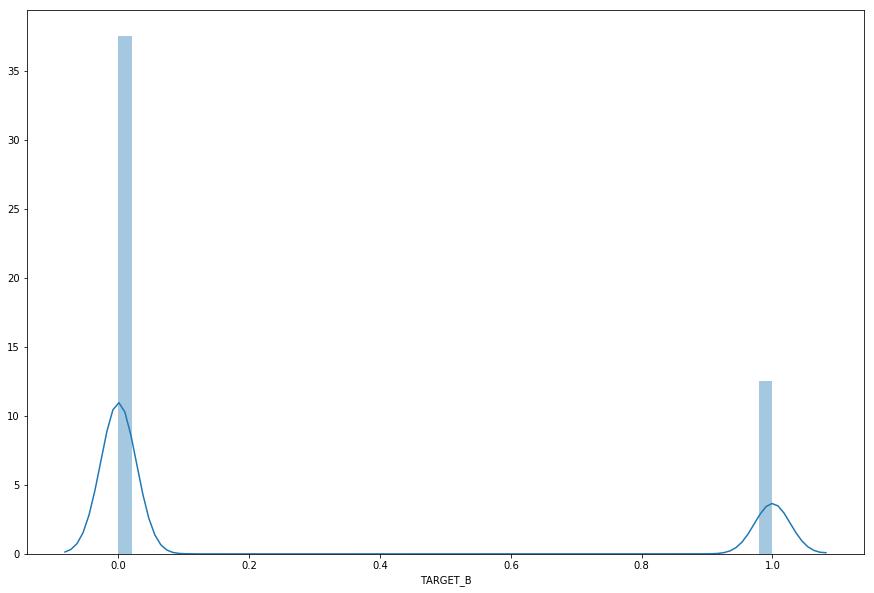

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['TARGET_B'])

Splitting the data into test and train with a proportion of 70-30 split and shuffle=True.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)


Feature scaling for better accuarcy of models

In [11]:
 from sklearn.preprocessing import StandardScaler  
 scaler = StandardScaler()  
 scaler.fit(X_train)  
 X_train = scaler.transform(X_train)  
 # apply same transformation to test data
 X_test = scaler.transform(X_test)  

# Model1: Random Forest Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier
#Setting the tuning parameter for the classifier for better accuracy and precision.
regressor = RandomForestClassifier(n_estimators=500, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [14]:
#Calculating the Accuracy, Precision and Recall for the model.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[4762   37]
 [1534   60]]
             precision    recall  f1-score   support

          0       0.76      0.99      0.86      4799
          1       0.62      0.04      0.07      1594

avg / total       0.72      0.75      0.66      6393

0.7542624745815736


# Model2: Naive Bayes Classification

In [15]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()

In [16]:
# fitting x samples and y classes 
modelnb.fit(X_train, y_train) 
y_prednb = modelnb.predict(X_test)  


In [17]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_prednb})
df3 = df2.head(25)
df3

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [18]:
print(confusion_matrix(y_test,y_prednb))  
print(classification_report(y_test,y_prednb))  
print(accuracy_score(y_test, y_prednb))  

[[4194  605]
 [1261  333]]
             precision    recall  f1-score   support

          0       0.77      0.87      0.82      4799
          1       0.36      0.21      0.26      1594

avg / total       0.67      0.71      0.68      6393

0.7081182543406851


# Model3: KNN classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

modelknn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
modelknn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
y_predknn = modelknn.predict(X_test)  

In [21]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predknn})
df5 = df4.head(25)
df5

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [22]:
print(confusion_matrix(y_test,y_predknn))  
print(classification_report(y_test,y_predknn))  
print(accuracy_score(y_test, y_predknn)) 

[[4056  743]
 [1295  299]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80      4799
          1       0.29      0.19      0.23      1594

avg / total       0.64      0.68      0.66      6393

0.6812138276239638


# Model 4: Support Vector Machine Classifier

In [23]:
# import support vector classifier 
from sklearn import svm # "Support Vector Classifier" 
modelsvm = svm.SVC() 
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_predictsvm = modelsvm.predict(X_test)

In [25]:
df6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictsvm})
df7 = df6.head(25)
df7

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [26]:
print(confusion_matrix(y_test,y_predictsvm))  
print(classification_report(y_test,y_predictsvm))  
print(accuracy_score(y_test, y_predictsvm))

[[4788   11]
 [1579   15]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86      4799
          1       0.58      0.01      0.02      1594

avg / total       0.71      0.75      0.65      6393

0.7512904739558892


# Model 5: Decision Tree Classifier

In [27]:
from sklearn import tree

modeldt = tree.DecisionTreeClassifier()
modeldt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_preddt= modeldt.predict(X_test)

In [29]:
df8 = pd.DataFrame({'Actual': y_test, 'Predicted': y_preddt})
df9 = df8.head(25)
df9

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
5,0,0
6,0,0
7,0,0
8,0,1
9,1,1


In [30]:
print(confusion_matrix(y_test,y_preddt))  
print(classification_report(y_test,y_preddt))  
print(accuracy_score(y_test, y_preddt))

[[3498 1301]
 [1105  489]]
             precision    recall  f1-score   support

          0       0.76      0.73      0.74      4799
          1       0.27      0.31      0.29      1594

avg / total       0.64      0.62      0.63      6393

0.6236508681370249


# Model 6: Multilayer Perceptron classifier

In [31]:
from sklearn.neural_network import MLPClassifier

modelmlp = MLPClassifier(shuffle=False)

modelmlp.fit(X_train, y_train)                         

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [32]:
y_predmlp= modelmlp.predict(X_test)

In [33]:
df10 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predmlp})
df11 = df10.head(25)
df11

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [34]:
print(confusion_matrix(y_test,y_predmlp))  
print(classification_report(y_test,y_predmlp))  
print(accuracy_score(y_test, y_predmlp))

[[4530  269]
 [1423  171]]
             precision    recall  f1-score   support

          0       0.76      0.94      0.84      4799
          1       0.39      0.11      0.17      1594

avg / total       0.67      0.74      0.67      6393

0.7353355232285312
